In [1]:
%cd /Users/sophiatonelli/library_script/script

import os
os.chdir('/Users/sophiatonelli/library_script/script/work')

from scipy.stats import gaussian_kde
import os, sys 
sys.path.append(os.getcwd()) 
from __future__ import print_function 
import numpy as np 
import matplotlib.pyplot as plt 
import script 
import matplotlib
from scipy.integrate import simps
from scipy.optimize import brentq
%matplotlib inline
matplotlib.rcParams.update({'font.size': 11})

/Users/sophiatonelli/library_script/script


In [2]:
gadget_snap = '/Users/sophiatonelli/Downloads/snap_120' 
outpath = '/Users/sophiatonelli/library_script/script/work/script_files' 
scaledist = 1e-3 
default_simulation_data = script.default_simulation_data(gadget_snap, outpath, sigma_8=0.829, ns=0.961, omega_b=0.0482, scaledist=scaledist) 

print("Simulation box size:", default_simulation_data.box, "cMpc/h")
print("Simulation redshift:", default_simulation_data.z) 

ngrid = 64 #128, i.e. resolution 256/128 cMpc/h 
matter_fields = script.matter_fields(default_simulation_data, ngrid, outpath, overwrite_files=False) 

Simulation box size: 256.0 cMpc/h
Simulation redshift: 8.0


In [9]:
"""
Using PC method to calculate the mean free path distribution for different Mmin and xhi values.
This code generates reionziation scenarios based of ZETA halo MASS DEPENDENT.


zeta = lambda M: zeta0 * (M / M_pivot) ** beta
It uses Beta parateter to estimate the zeta value for different Mmin and xhi values.

ZETA VALS ARE SAVED IN NUMPY ARRAY
"""

'\nUsing PC method to calculate the mean free path distribution for different Mmin and xhi values.\nThis code generates reionziation scenarios based of ZETA halo MASS DEPENDENT.\n\n\nzeta = lambda M: zeta0 * (M / M_pivot) ** beta\nIt uses Beta parateter to estimate the zeta value for different Mmin and xhi values.\n\nZETA VALS ARE SAVED IN NUMPY ARRAY\n'

In [4]:
from scipy.optimize import brentq


zetaM_vals_pc = []

list_betas = [-0.2,0, 0.5] 
list_log10Mmin_vals = [8.0, 9.0, 10.0]
list_xhi_vals = [0.5] #[0.2, 0.5, 0.7]

M_pivot= 1e9

for beta in list_betas: #3 betas
    print(beta)
    for log10Mmin in list_log10Mmin_vals:
        print(f"\n logMmin={log10Mmin} with beta={beta}")
        
        zeta_M_func = lambda M: (M / M_pivot) ** beta
        fcoll_M_arr = matter_fields.get_zeta_fcoll(zeta_M_func, log10Mmin=log10Mmin, dlog10M=0.2) 

        delta = matter_fields.densitycontr_arr
        
        for target_xhi in list_xhi_vals:
            #ionization_map = script.ionization_map(matter_fields)

            def root_finding(zeta0):
                return np.mean(zeta0 * fcoll_M_arr * (1+delta)) - (1 - target_xhi)

            try:

                zeta0_root = brentq(root_finding, 0.01, 500, xtol= 1e-2)
                zetaM_vals_pc.append((log10Mmin, beta, target_xhi, zeta0_root))
                print(f"YES zeta_0 = {zeta0_root:.3f} for log10Mmin={log10Mmin}, beta={beta}, xHI={target_xhi}")

            except ValueError:
                print(f"NO root found for log10Mmin={log10Mmin}, beta={beta}, xHI={target_xhi}")
                zetaM_vals_pc.append((log10Mmin, beta, target_xhi, None))

print("\n All zeta_0 values (should be 27):")
for result in zetaM_vals_pc:
    print(f"log10Mmin={result[0]}, beta={result[1]}, xHI={result[2]} -> zeta_0={result[3]}")   

-0.2

 logMmin=8.0 with beta=-0.2
YES zeta_0 = 9.417 for log10Mmin=8.0, beta=-0.2, xHI=0.5

 logMmin=9.0 with beta=-0.2
YES zeta_0 = 32.769 for log10Mmin=9.0, beta=-0.2, xHI=0.5

 logMmin=10.0 with beta=-0.2
YES zeta_0 = 219.803 for log10Mmin=10.0, beta=-0.2, xHI=0.5
0

 logMmin=8.0 with beta=0
YES zeta_0 = 10.142 for log10Mmin=8.0, beta=0, xHI=0.5

 logMmin=9.0 with beta=0
YES zeta_0 = 25.078 for log10Mmin=9.0, beta=0, xHI=0.5

 logMmin=10.0 with beta=0
YES zeta_0 = 117.426 for log10Mmin=10.0, beta=0, xHI=0.5
0.5

 logMmin=8.0 with beta=0.5
YES zeta_0 = 7.604 for log10Mmin=8.0, beta=0.5, xHI=0.5

 logMmin=9.0 with beta=0.5
YES zeta_0 = 10.203 for log10Mmin=9.0, beta=0.5, xHI=0.5

 logMmin=10.0 with beta=0.5
YES zeta_0 = 22.684 for log10Mmin=10.0, beta=0.5, xHI=0.5

 All zeta_0 values (should be 27):
log10Mmin=8.0, beta=-0.2, xHI=0.5 -> zeta_0=9.41693555446326
log10Mmin=9.0, beta=-0.2, xHI=0.5 -> zeta_0=32.76893800982131
log10Mmin=10.0, beta=-0.2, xHI=0.5 -> zeta_0=219.80278505629707
l

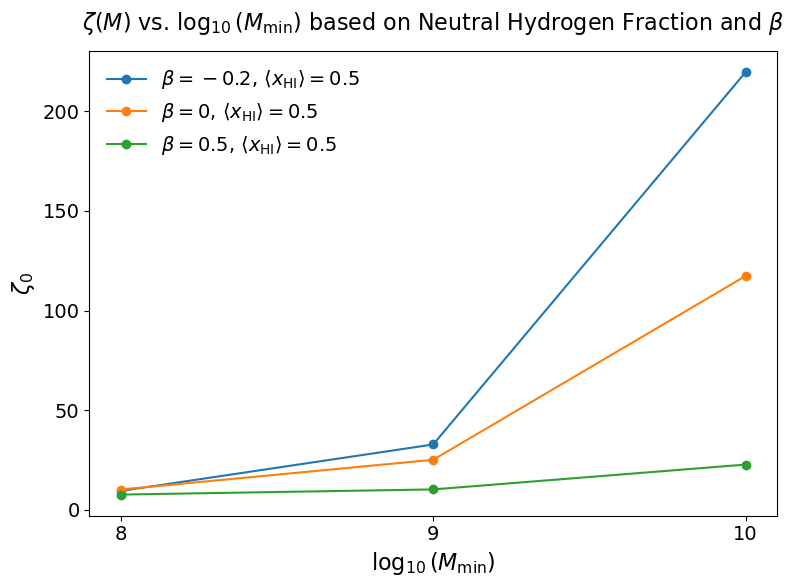

In [5]:
plt.figure(figsize=(8,6)) 
 
betas = sorted(set([r[1] for r in zetaM_vals_pc]))
xhi_vals = sorted(set([r[2] for r in zetaM_vals_pc]))
log10Mmin_unique = sorted(set([r[0] for r in zetaM_vals_pc]))

for beta in betas:
    for xhi in xhi_vals:
        log10Mmin_list = []
        zeta0_list = []
        for r in zetaM_vals_pc:
            if r[1] == beta and r[2] == xhi:
                log10Mmin_list.append(r[0])
                zeta0_list.append(r[3])
        plt.plot(log10Mmin_list, zeta0_list, marker='o', label=rf"$\beta={beta}$, $\langle x_{{\mathrm{{HI}}}}\rangle={xhi}$")

plt.xlabel(r'$\log_{10}(M_{\mathrm{min}})$', fontsize=16)
plt.ylabel(r'$\zeta_{{0}}$',fontsize=16)
plt.xticks(log10Mmin_unique)  
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(frameon=False, fontsize=14)
plt.title(r'$\zeta(M) $ vs. $\log_{10}(M_{\mathrm{min}})$ based on Neutral Hydrogen Fraction and $\beta $', fontsize=16, pad=15)
plt.tight_layout()
plt.show()

In [6]:
np.save("zetaM_vals_pc.npy",   [r[3] for r in zetaM_vals_pc if r[3] is not None]) #saving onlu zeta0 values from the list

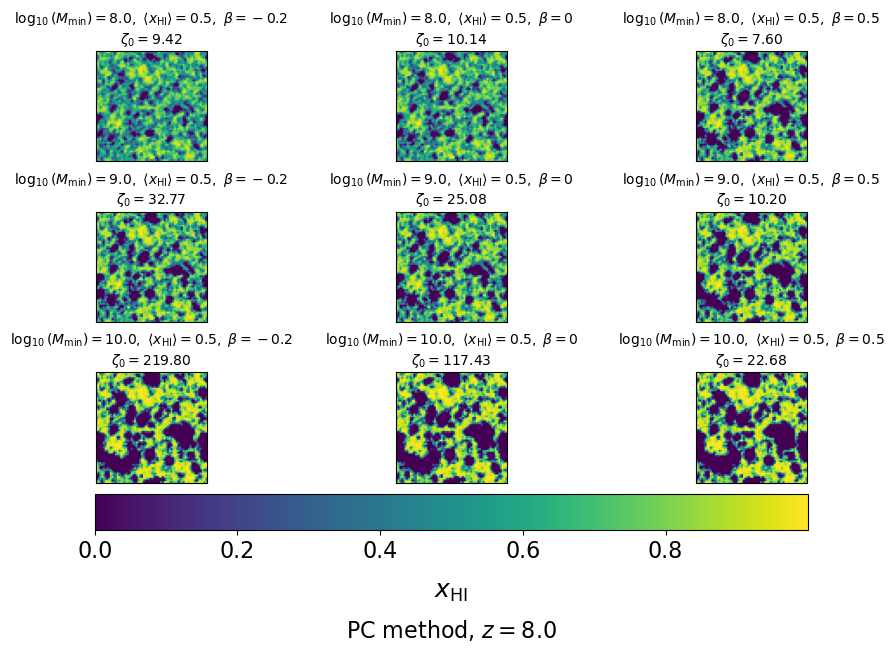

In [14]:
nrows, ncols = 3, 3 #9 (log10Mmin, xHI) pairs, 2 betas
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3* ncols, 2 * nrows), constrained_layout=True) #4,2

log10Mmin_unique = sorted(set([r[0] for r in zetaM_vals_pc]))
beta_unique = sorted(set([r[1] for r in zetaM_vals_pc]))
#xhi_unique = sorted(set([r[2] for r in zetaM_vals_pc]))


ngrid= 64 #128, RESOLUTION


M_pivot = 1e9  #pivot mass for zeta_M function
matter_fields = script.matter_fields(default_simulation_data, ngrid, outpath, overwrite_files=False)

for i, log10Mmin in enumerate(log10Mmin_unique):
        for j, beta in enumerate(beta_unique):
            ax = axes[i, j] 
            match = [r for r in zetaM_vals_pc if r[0] == log10Mmin and r[1] == beta and r[2] == xhi ] 
            if not match:
                continue
            zeta0 = match[0][3] #(log10Mmin, beta, xHI, zeta0), so zeta0 is the 4th element in the list

            zeta_M_func = lambda M: zeta0* (M / M_pivot) ** beta

            zeta_fcoll_arr= matter_fields.get_zeta_fcoll(zeta_M_func, log10Mmin=log10Mmin, dlog10M=0.2)
            #fcoll_arr = matter_fields.get_fcoll_for_Mmin(log10Mmin)
            ionization_map = script.ionization_map(matter_fields)
            qi_arr = ionization_map.get_qi(zeta_fcoll_arr)

            im = ax.imshow(
                1 - qi_arr[:, :, int(0.5*ngrid)],
                extent=[0, default_simulation_data.box, 0, default_simulation_data.box],
                cmap='viridis'
            )
            
            ax.set_title(
                rf"$\log_{{10}}(M_{{\min}})={log10Mmin},\ \langle x_{{\mathrm{{HI}}}} \rangle={xhi},\ \beta={beta}$" "\n"
                rf"$\zeta_{{0}}={zeta0:.2f}$",
                fontsize=10)

            ax.set_xticks([])
            ax.set_yticks([])

fig.text(
    0.5, -0.02, rf'PC method, '+rf'$z={default_simulation_data.z:.1f}$',
    fontsize=16,
    ha='center',
    va='top'
)

cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.8, pad=0.02,
                    label=r'$x_{\mathrm{HI}}$', orientation='horizontal')
cbar.ax.tick_params(labelsize=16)
cbar.set_label(r'$x_{\mathrm{HI}}$', fontsize=18, labelpad=12)
plt.show()

In [15]:
box_size = default_simulation_data.box  #in cMpc/h
cell_size = box_size / ngrid


def apply_periodic_index(idx, ngrid):
    return idx % ngrid

def apply_periodic_pos(pos, ngrid):
    return np.mod(pos, ngrid)

def choose_random_direction(): 
    theta = np.arccos(np.random.uniform(-1, 1))  #theta range: 0 to pi
    phi = np.random.uniform(0, 2 * np.pi)
    x_vec = np.sin(theta) * np.cos(phi)
    y_vec = np.sin(theta) * np.sin(phi)
    z_vec = np.cos(theta)
    return np.array([x_vec, y_vec, z_vec], dtype=np.float64)

def launching_rays(start_idx, random_direction_vector, ionized_mask, ngrid, cell_size, step_size=1.0): #step_size=1.0
    pos = np.array(start_idx, dtype=np.float64)
    distance=0.0
    max_distance = 3 * ngrid #boxsize
    while distance < max_distance:
    #for _ in range(max_steps):
        pos += random_direction_vector * step_size
        pos = apply_periodic_pos(pos, ngrid) 
        idx = np.floor(pos).astype(int) 
        idx = apply_periodic_index(idx, ngrid)
        if not ionized_mask[tuple(idx)]:
            return distance * cell_size   #step_size * _ * cell_size 
        distance += step_size      
    return max_distance * cell_size #max_step_size 

Processing log10(Mmin)=8.0, xhi= 0.50, zeta=9.42, beta=-0.20
area pdf 1.221586512686828
bsd 0.9999999999999999
96514/262144 cells are marked as region of interest (ROI).
MFP method applied on 3D data.
Initialising random rays... done
Estimating ray lengths...


100%|██████████| 64/64 [00:01<00:00, 43.23it/s]



Program runtime: 0.03 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
area bsd tools21 1.0
Processing log10(Mmin)=8.0, xhi= 0.50, zeta=10.14, beta=0.00
area pdf 1.2026346906112826
bsd 1.0
94286/262144 cells are marked as region of interest (ROI).
MFP method applied on 3D data.
Initialising random rays... done
Estimating ray lengths...


100%|██████████| 64/64 [00:01<00:00, 43.68it/s]



Program runtime: 0.03 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
area bsd tools21 1.0000000000000002
Processing log10(Mmin)=8.0, xhi= 0.50, zeta=7.60, beta=0.50
area pdf 1.0583728281968119
bsd 1.0000000000000002
93268/262144 cells are marked as region of interest (ROI).
MFP method applied on 3D data.
Initialising random rays... done
Estimating ray lengths...


100%|██████████| 64/64 [00:01<00:00, 42.33it/s]



Program runtime: 0.03 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
area bsd tools21 0.9999999999999999
Processing log10(Mmin)=9.0, xhi= 0.50, zeta=32.77, beta=-0.20
area pdf 1.128255983856274
bsd 1.0
94930/262144 cells are marked as region of interest (ROI).
MFP method applied on 3D data.
Initialising random rays... done
Estimating ray lengths...


100%|██████████| 64/64 [00:01<00:00, 45.01it/s]



Program runtime: 0.03 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
area bsd tools21 1.0
Processing log10(Mmin)=9.0, xhi= 0.50, zeta=25.08, beta=0.00
area pdf 1.1017093804999885
bsd 1.0
94945/262144 cells are marked as region of interest (ROI).
MFP method applied on 3D data.
Initialising random rays... done
Estimating ray lengths...


100%|██████████| 64/64 [00:01<00:00, 41.26it/s]



Program runtime: 0.03 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
area bsd tools21 1.0
Processing log10(Mmin)=9.0, xhi= 0.50, zeta=10.20, beta=0.50
area pdf 0.9889234115773022
bsd 1.0
96480/262144 cells are marked as region of interest (ROI).
MFP method applied on 3D data.
Initialising random rays... done
Estimating ray lengths...


100%|██████████| 64/64 [00:01<00:00, 41.64it/s]



Program runtime: 0.03 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
area bsd tools21 1.0
Processing log10(Mmin)=10.0, xhi= 0.50, zeta=219.80, beta=-0.20
area pdf 0.9156330974650507
bsd 0.9999999999999998
101333/262144 cells are marked as region of interest (ROI).
MFP method applied on 3D data.
Initialising random rays... done
Estimating ray lengths...


100%|██████████| 64/64 [00:01<00:00, 37.11it/s]



Program runtime: 0.03 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
area bsd tools21 0.9999999999999999
Processing log10(Mmin)=10.0, xhi= 0.50, zeta=117.43, beta=0.00
area pdf 0.8999116370511939
bsd 1.0000000000000002
101766/262144 cells are marked as region of interest (ROI).
MFP method applied on 3D data.
Initialising random rays... done
Estimating ray lengths...


100%|██████████| 64/64 [00:01<00:00, 34.98it/s]



Program runtime: 0.03 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
area bsd tools21 1.0
Processing log10(Mmin)=10.0, xhi= 0.50, zeta=22.68, beta=0.50
area pdf 0.8708470334383145
bsd 1.0000000000000002
102930/262144 cells are marked as region of interest (ROI).
MFP method applied on 3D data.
Initialising random rays... done
Estimating ray lengths...


100%|██████████| 64/64 [00:01<00:00, 35.21it/s]



Program runtime: 0.03 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.
area bsd tools21 1.0


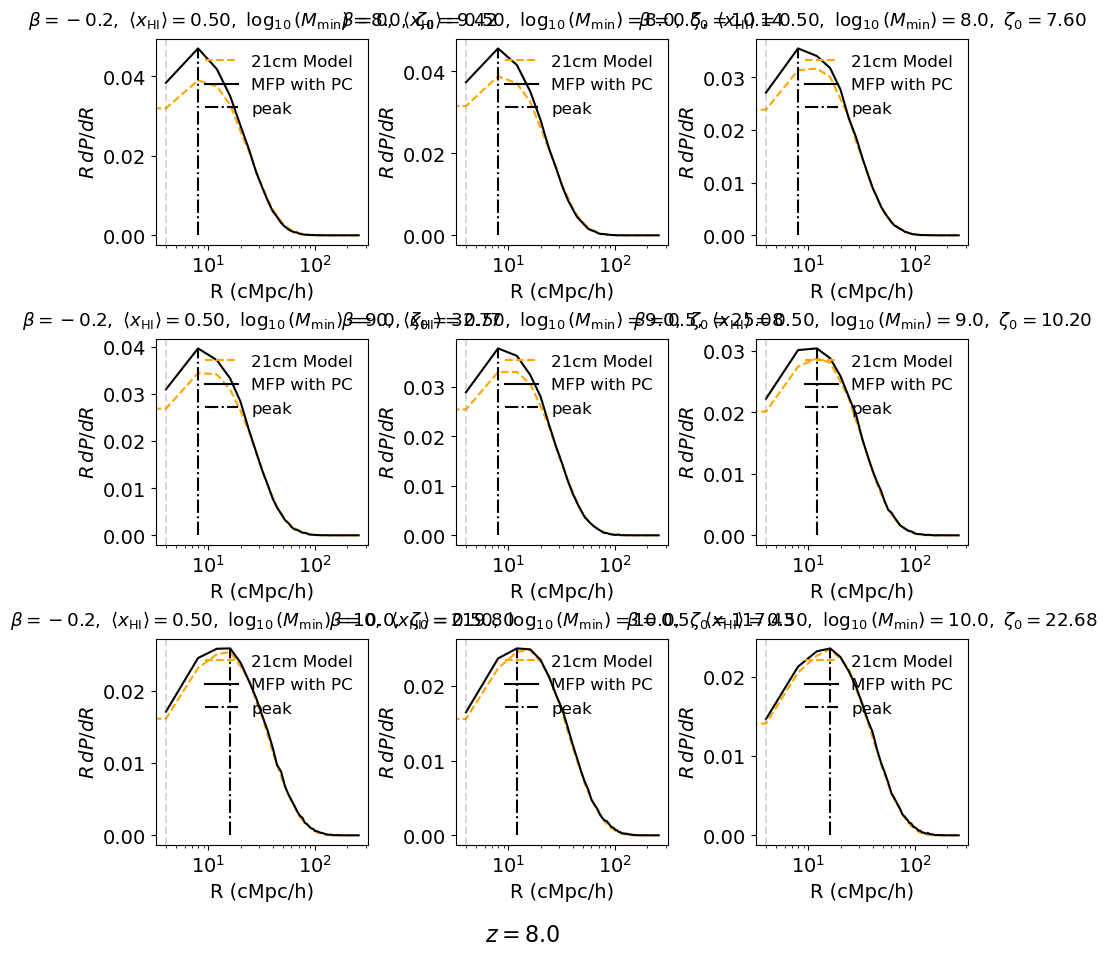

Summary peaks: [0.04699018977584627, 0.045610925842096174, 0.03551338820945657, 0.039692109550183506, 0.0377297637003478, 0.03038534719660825, 0.0258204008144744, 0.025016541020147682, 0.02361601710070568]


In [16]:
import tools21cm as t2c

nrows, ncols = 3, 3 #9 (log10Mmin, xHI) pairs, 2 betas
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3* ncols, 3 * nrows), constrained_layout=True) #4,2

peaks=[]

log10Mmin_unique = sorted(set([r[0] for r in zetaM_vals_pc]))
beta_unique = sorted(set([r[1] for r in zetaM_vals_pc]))
#xhi_unique = sorted(set([r[2] for r in zetaM_vals_pc]))

ngrid=64 #128
M_pivot = 1e9  #pivot mass for zeta_M function
matter_fields = script.matter_fields(default_simulation_data, ngrid, outpath, overwrite_files=False)

for i, log10Mmin in enumerate(log10Mmin_unique):
    for j, beta in enumerate(beta_unique): 
            ax = axes[i, j]
            match = [r for r in zetaM_vals_pc if r[0] == log10Mmin and r[1] == beta and r[2] == xhi]
            if not match:
                continue
            zeta0 = match[0][3]

            print(f"Processing log10(Mmin)={log10Mmin}, xhi= {xhi:.2f}, zeta={zeta0:.2f}, beta={beta:.2f}")

            zeta_M_func = lambda M: zeta0* (M / M_pivot) ** beta

            zeta_fcoll_arr= matter_fields.get_zeta_fcoll(zeta_M_func, log10Mmin=log10Mmin, dlog10M=0.2)
            ionization_map = script.ionization_map(matter_fields)
            qi_arr = ionization_map.get_qi(zeta_fcoll_arr)

            threshold = 0.5 #1.0
            ionized_mask = (qi_arr >= threshold) #mask for ionized cells
            box_size = default_simulation_data.box  #in cMpc/h
            cell_size = box_size / ngrid

            #es_ionized_mask = (es_qi_arr >= threshold) #ES mask for ionized cells

            mean_free_paths = []
            num_iterations = 1000000 

            for _ in range(num_iterations):
                idx = np.random.randint(0, ngrid, size=3)
                if not ionized_mask[tuple(idx)]: #check if ionized
                    continue
                vector_direction = choose_random_direction()
                mfp = launching_rays(idx, vector_direction, ionized_mask, ngrid, cell_size) #, box_size
                mean_free_paths.append(mfp)
            physical_mfp = np.array(mean_free_paths)

            R_min = cell_size #4 or 2cMPc/h
            R_max = box_size
            smooth_R = np.linspace(R_min, R_max, 64) #64
            
            #PC
            kde = gaussian_kde(physical_mfp)
            smooth_pdf = kde(smooth_R)
            print("area pdf",np.trapz(smooth_pdf, smooth_R))
            bsd = smooth_R * smooth_pdf
            bsd /= np.trapz(bsd, smooth_R)
            print("bsd", np.trapz(bsd, smooth_R))

            peak_idx = np.argmax(bsd)
            peak=bsd[peak_idx]
            peaks.append(peak)
   
            r_mfp, dn_mfp = t2c.mfp(ionized_mask, boxsize=box_size, iterations=1000000)
            dn_mfp /= np.trapz(dn_mfp, r_mfp)
            print("area bsd tools21", np.trapz(dn_mfp, r_mfp))

    
           
            ax.plot(r_mfp, dn_mfp, label='21cm Model', linestyle='--', color='orange')
            ax.plot(smooth_R, bsd, label='MFP with PC', color='black')
            ax.vlines(smooth_R[peak_idx], ymin=0, ymax=peak, linestyle='-.', color='black', label='peak')
            #ax.plot(smooth_R, smooth_R * ES_smooth_pdf, label = 'MFP with ES', color = 'green' )
            ax.axvline(cell_size, linestyle = '--', color='grey', alpha=0.3)
            ax.legend(fontsize=12, loc='upper right', frameon=False)

            #mean, peak and variance
            ax.set_title(
            rf"$\beta = {beta},\ \langle x_{{\mathrm{{HI}}}} \rangle = {xhi:.2f},\ "
            rf"\log_{{10}}(M_{{\min}}) = {log10Mmin},\ \zeta_0 = {zeta0:.2f}$",
            pad=10)

            ax.set_xscale('log')
            ax.set_xlabel("R (cMpc/h)", fontsize=14)
            ax.set_ylabel(r"$R\,dP/dR$", fontsize=14)
            ax.tick_params(labelsize=14)

fig.text(
    0.5, -0.02, rf'$z={default_simulation_data.z:.1f}$',
    fontsize=16,
    ha='center',
    va='top'
)


#plt.savefig('/Users/sophiatonelli/Desktop/pngs_mpia/week3_script_combinations/smooth_refined_bsd_combinations_redshift7.png', dpi=300, bbox_inches='tight')
plt.show()

print("Summary peaks:", peaks)


In [ ]:
import pandas as pd #store peaks for MCMC calculations

peaks= []

rows = []
peak_idx = 0 #start counting peaks idx to go through all len(peaks)

for i, log10Mmin in enumerate(log10Mmin_unique):
    for j, xhi in enumerate(xhi_unique):
        for k, beta in enumerate(beta_unique):
            if peak_idx < len(peaks):
                rows.append( { "log10Mmin": log10Mmin,"xHI": round(xhi, 3),"beta": beta,"Peak": round(peaks[peak_idx], 4)} )
                peak_idx += 1

df_peaks = pd.DataFrame(rows) #display created table
print(df_peaks.to_string(index=False))
df_peaks.to_csv("/Users/sophiatonelli/Desktop/w6_code/summary_PC_peaks_zetaM.csv", index=False)

In [ ]:
import csv 

with open('/Users/sophiatonelli/Desktop/w6_code/summary_PC_peaks_zetaM.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row[3])


In [ ]:
  
with open('/Users/sophiatonelli/Desktop/w6_code/summary_PC_peaks_zetaM.csv', 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            print(row)
